# Movie Sequel Analysis
### Alex Bass

I want to approach this by copying down questions then answering them 1 by 1.

0. Are there more sequels over time?
1. On average, do sequels make more than the original?
2. On average, are sequels more quality than the original?
3. On average, are sequels more popular than the original?
4. Do sequels get less budget?
5. Does budget affect the success of sequels?
6. Are sequels that keep the same director more or less successful?
7. Perhaps look into popular production companies. Are movies different for certain production companies?
8. How does time between a film affect its success(popularity and revenue)?


viz ideas:
- maybe create a dashboard showing the success over time of all the groups and have a option to select popularity or box office revenue.

todo:
- Maybe go through and add zeros to budget numbers and revenue numbers?
- Maybe run a regression for these three DVs: Revenue, Popularity, IMBD Score

In [63]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
data = pd.read_excel("./edited.xlsx")
data.head()

,Description,URL,Title Type,IMDb Rating,Runtime (mins),Genres,Num Votes,Release Date,Directors,production_company,popularity,production_country,language,revenue,sequel_group,budget,Year,Title,sequel_num,delete
0,NaN,https://www.imdb.com/title/tt0145487/,Movie,7.4,121.0,"Action, Adventure, Sci-Fi",874405,5/3/02,Sam Raimi,"Marvel Enterprises, Laura Ziskin Productions, ...",113.559,United States of America,en,821708551,1,139000000,2002,Spider-Man,1,NaN
1,NaN,https://www.imdb.com/title/tt0316654/,Movie,7.5,127.0,"Action, Adventure, Sci-Fi",704005,6/30/04,Sam Raimi,"Marvel Enterprises, Laura Ziskin Productions, ...",39.440,United States of America,en,788976453,1,200000000,2004,Spider-Man 2,2,NaN
2,NaN,https://www.imdb.com/title/tt0413300/,Movie,6.3,139.0,"Action, Adventure, Sci-Fi",633858,5/4/07,Sam Raimi,"Laura Ziskin Productions, Marvel Studios, Colu...",85.522,United States of America,en,894983373,1,258000000,2007,Spider-Man 3,3,NaN
3,NaN,https://www.imdb.com/title/tt0133093/,Movie,8.7,136.0,"Action, Sci-Fi",2040270,3/31/1999,"Lana Wachowski, Lilly Wachowski","Village Roadshow Pictures, Groucho II Film Par...",106.254,United States of America,en,463517383,2,63000000,1999,The Matrix,1,NaN
4,NaN,https://www.imdb.com/title/tt0234215/,Movie,7.2,138.0,"Action, Sci-Fi",627738,5/15/03,"Lana Wachowski, Lilly Wachowski","Village Roadshow Pictures, Silver Pictures, NP...",70.440,United States of America,en,738599701,2,150000000,2003,The Matrix Reloaded,2,NaN


Need to do a few more cleaning steps:
1. Delete movies that do not have sequels marked in delete column
2. Search for movies that do not have sequels programatically, then delete
3. I edited `sequel_num`, but did not edit `sequel_group`

In [65]:
data = data.query("delete != 1").reset_index(drop = True).drop(columns = ['delete'])
data.head()

,Description,URL,Title Type,IMDb Rating,Runtime (mins),Genres,Num Votes,Release Date,Directors,production_company,popularity,production_country,language,revenue,sequel_group,budget,Year,Title,sequel_num
0,NaN,https://www.imdb.com/title/tt0145487/,Movie,7.4,121.0,"Action, Adventure, Sci-Fi",874405,5/3/02,Sam Raimi,"Marvel Enterprises, Laura Ziskin Productions, ...",113.559,United States of America,en,821708551,1,139000000,2002,Spider-Man,1
1,NaN,https://www.imdb.com/title/tt0316654/,Movie,7.5,127.0,"Action, Adventure, Sci-Fi",704005,6/30/04,Sam Raimi,"Marvel Enterprises, Laura Ziskin Productions, ...",39.440,United States of America,en,788976453,1,200000000,2004,Spider-Man 2,2
2,NaN,https://www.imdb.com/title/tt0413300/,Movie,6.3,139.0,"Action, Adventure, Sci-Fi",633858,5/4/07,Sam Raimi,"Laura Ziskin Productions, Marvel Studios, Colu...",85.522,United States of America,en,894983373,1,258000000,2007,Spider-Man 3,3
3,NaN,https://www.imdb.com/title/tt0133093/,Movie,8.7,136.0,"Action, Sci-Fi",2040270,3/31/1999,"Lana Wachowski, Lilly Wachowski","Village Roadshow Pictures, Groucho II Film Par...",106.254,United States of America,en,463517383,2,63000000,1999,The Matrix,1
4,NaN,https://www.imdb.com/title/tt0234215/,Movie,7.2,138.0,"Action, Sci-Fi",627738,5/15/03,"Lana Wachowski, Lilly Wachowski","Village Roadshow Pictures, Silver Pictures, NP...",70.440,United States of America,en,738599701,2,150000000,2003,The Matrix Reloaded,2


In [66]:
#This group I need to create multiple ones
fltr = data.groupby("sequel_group").apply(lambda x : sum(x.sequel_num == 1)>1)
fltr = fltr.index[fltr].to_list()

In [67]:
#takes my list of doubled sequel groups and separates them
for grp_num in fltr:
    tmp = data.query("sequel_group == @grp_num")
    counter = 0
    rows_to_rename = []
    for row, data_row in tmp.iterrows():
        if data_row['sequel_num'] == 1:
            counter += 1
        if counter ==2:
            rows_to_rename.append(row)
    new_group = data.sequel_group.max()+1
    data.loc[rows_to_rename, "sequel_group"] = new_group
    

In [68]:
fltr = data.groupby("sequel_group").apply(lambda x : sum(x.sequel_num == 1)>1)
fltr.index[fltr].to_list()

[]

In [69]:
# for this group I need to set the previous sequel group
fltr = data.groupby("sequel_group").apply(lambda x : sum(x.sequel_num == 1)==0)
fltr = fltr.index[fltr].to_list()

In [70]:
#take groups that need to be added to the previous group and add them to it.
for grp_num in fltr:
    tmp = data.query("sequel_group == @grp_num")
    idx_to_check = tmp.index[0] - 1
    new_group = data.loc[idx_to_check, "sequel_group"]
    ids_to_change = tmp.index.to_list()
    data.loc[ids_to_change, "sequel_group"] = new_group

In [71]:
fltr = data.groupby("sequel_group").apply(lambda x : sum(x.sequel_num == 1)==0)
fltr.index[fltr].to_list()

[]

Here are a few links were I left off:
1. https://developer.themoviedb.org/docs/finding-data
2. https://www.themoviedb.org/bible/movie/59f3b16d9251414f20000001#59f73b759251416e71000007

In [72]:
data.to_csv("cleaned_data.csv", index=False)

## Are There More Movie Sequels Over Time?

Text(0.7, -0.17, 'Source: IMBD/TMBD')

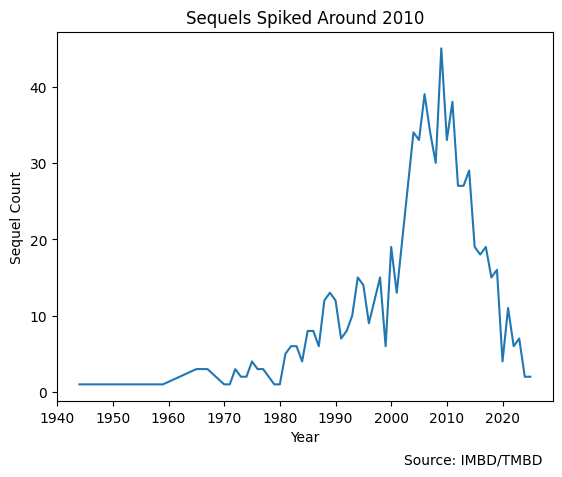

In [56]:
# filter to sequels only
sequels = data.query("sequel_num >= 2")

# Scatter plot X: Time, Y: Count
y = sequels.groupby("Year").agg('count')['Title'].to_list()
x = sequels.groupby("Year").agg('count')['Title'].index.to_list()

sns.lineplot(x=x, y=y)
plt.title("Sequels Spiked Around 2010")
plt.xlabel("Year")
plt.ylabel("Sequel Count")
plt.annotate(
    "Source: IMBD/TMBD",
    xy=(0.7, -0.17),
    xycoords="axes fraction",
)

We see very few movie sequels in the mid 1900s, but sequels steadily increase spiking around 2010. There seems to be evidence of movie sequels decreasing again. 

*Note: The important information we don't see here is total movies made over time. It would be better if these numbers were a proportion.*

## On Average, Do Sequels Make More Than The Original?

Text(0.7, -0.17, 'Source: IMBD/TMBD')

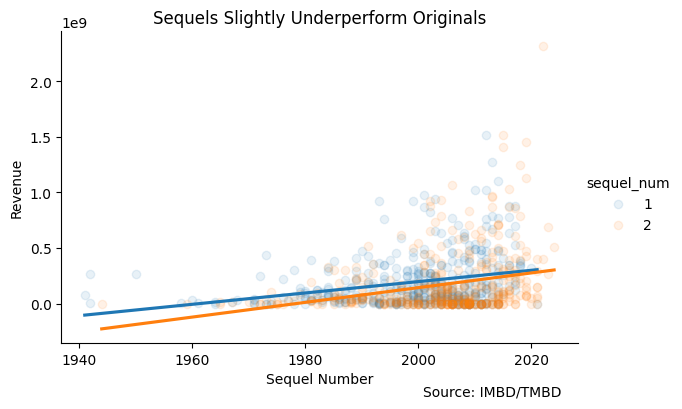

In [57]:
sequels12 = data.query("sequel_num in [1,2]")
#sns.scatterplot(x="Year",y="revenue",data=sequels12,hue="sequel_num")
sns.lmplot(x="Year",y="revenue",data=sequels12,hue="sequel_num",
           height=4, aspect=1.5, ci=None,
           scatter_kws={"alpha":0.1}
)
plt.title("Sequels Slightly Underperform Originals")
plt.ylabel("Revenue")
plt.xlabel("Sequel Number")
plt.annotate(
    "Source: IMBD/TMBD",
    xy=(0.7, -0.17),
    xycoords="axes fraction",
)

Text(0.7, -0.17, 'Source: IMBD/TMBD')

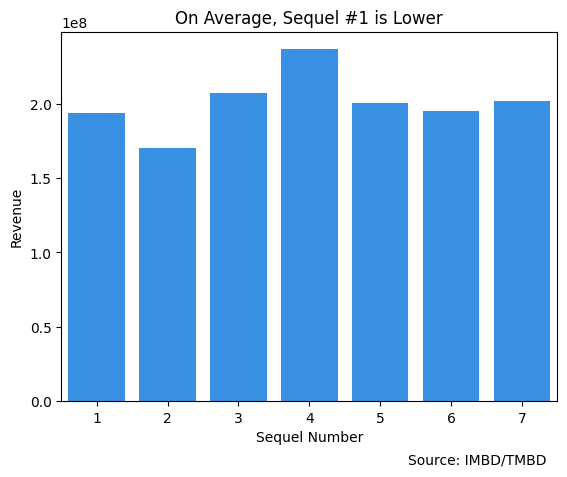

In [58]:
sequels12 = data.query("sequel_num in [1,2,3,4,5,6,7]")
x = sequels12.groupby('sequel_num')['revenue'].agg("mean").index.to_list()
y = sequels12.groupby('sequel_num')['revenue'].agg("mean").to_list()
sns.barplot(x=x,y=y, color="dodgerblue")
plt.title("On Average, Sequel #1 is Lower")
plt.ylabel("Revenue")
plt.xlabel("Sequel Number")
plt.annotate(
    "Source: IMBD/TMBD",
    xy=(0.7, -0.17),
    xycoords="axes fraction",
)

## Are Sequels More Quality?

Text(0.7, -0.17, 'Source: IMBD/TMBD')

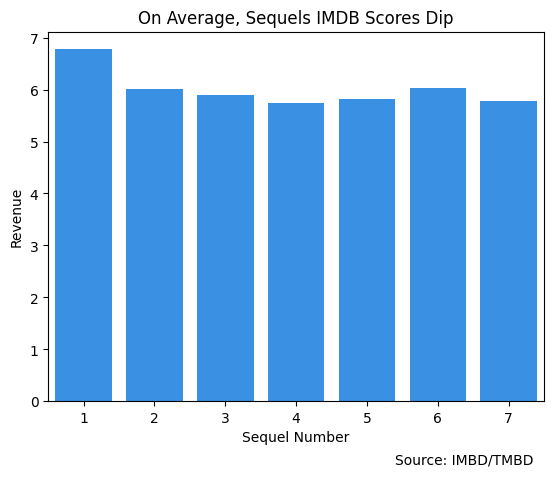

In [59]:
sequels12 = data.query("sequel_num in [1,2,3,4,5,6,7]")
x = sequels12.groupby('sequel_num')['IMDb Rating'].agg("mean").index.to_list()
y = sequels12.groupby('sequel_num')['IMDb Rating'].agg("mean").to_list()
sns.barplot(x=x,y=y, color="dodgerblue")
plt.title("On Average, Sequels IMDB Scores Dip")
plt.ylabel("Revenue")
plt.xlabel("Sequel Number")
plt.annotate(
    "Source: IMBD/TMBD",
    xy=(0.7, -0.17),
    xycoords="axes fraction",
)

## Are Sequels More Popular?

Text(0.7, -0.17, 'Source: IMBD/TMBD')

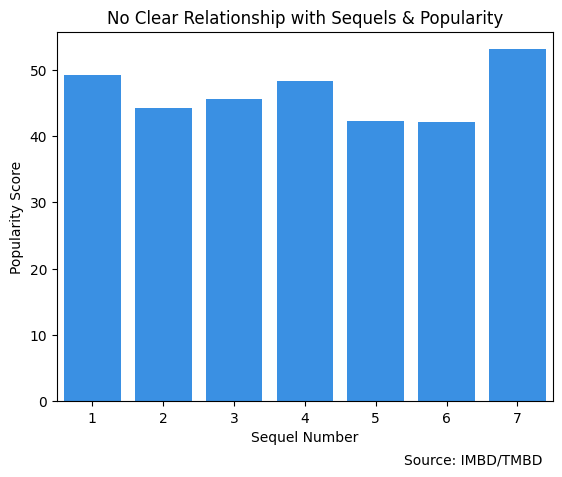

In [60]:
sequels12 = data.query("sequel_num in [1,2,3,4,5,6,7]")
x = sequels12.groupby('sequel_num')['popularity'].agg("mean").index.to_list()
y = sequels12.groupby('sequel_num')['popularity'].agg("mean").to_list()
sns.barplot(x=x,y=y, color="dodgerblue")
plt.title("No Clear Relationship with Sequels & Popularity")
plt.ylabel("Popularity Score")
plt.xlabel("Sequel Number")
plt.annotate(
    "Source: IMBD/TMBD",
    xy=(0.7, -0.17),
    xycoords="axes fraction",
)

## Do Sequels Get Less Budget?

Text(0.7, -0.17, 'Source: IMBD/TMBD')

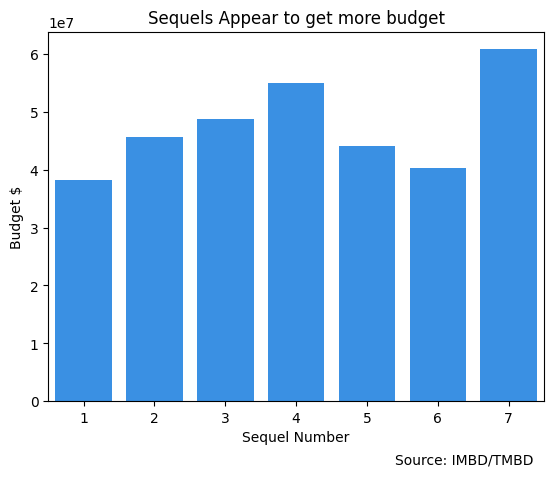

In [62]:
sequels12 = data.query("sequel_num in [1,2,3,4,5,6,7]")
x = sequels12.groupby('sequel_num')['budget'].agg("mean").index.to_list()
y = sequels12.groupby('sequel_num')['budget'].agg("mean").to_list()
sns.barplot(x=x,y=y, color="dodgerblue")
plt.title("Sequels Appear to get more budget")
plt.ylabel("Budget $")
plt.xlabel("Sequel Number")
plt.annotate(
    "Source: IMBD/TMBD",
    xy=(0.7, -0.17),
    xycoords="axes fraction",
)